In [1076]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1077]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [1079]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

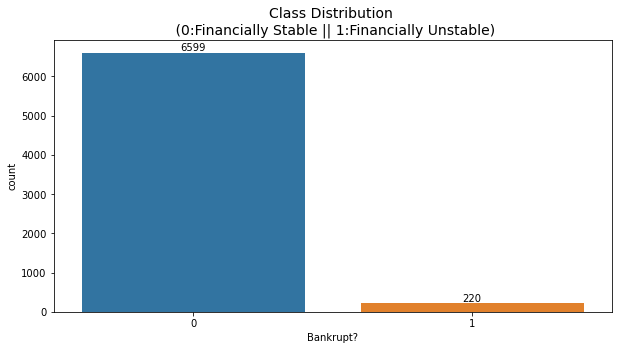

In [1080]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [1081]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [1082]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

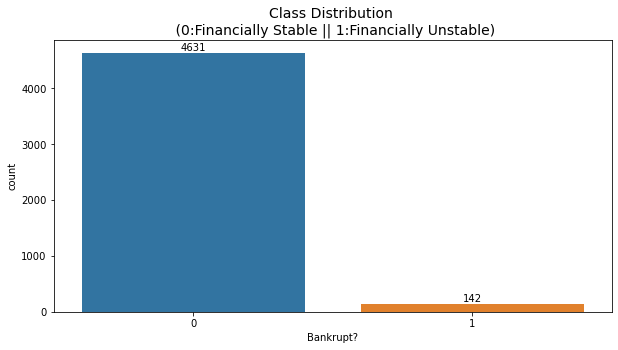

In [1083]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [1084]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

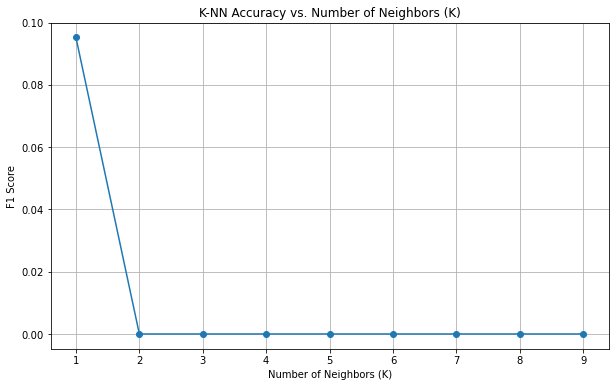

In [1085]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_val_pred = knn_classifier.predict(X_val)
    f1_value = f1_score(y_val, y_val_pred)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [1086]:
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [1087]:
# Step 4: Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1088]:
# Step 5: Predict on the validation data
y_val_pred = knn_classifier.predict(X_val)

In [1089]:
# Step 6: Evaluate the model on the validation data
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.9442815249266863


In [1090]:
conf_matrix_validation = confusion_matrix(y_val, y_val_pred)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[963  21]
 [ 36   3]]


In [1091]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.94
Precision: 0.12
Recall: 0.08
F1 Score: 0.10


In [1092]:
# Step 7: Predict on the testing data
y_test_pred = knn_classifier.predict(X_test)

In [1093]:
# Step 8: Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9423264907135875


In [1094]:
conf_matrix_testing = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[961  23]
 [ 36   3]]


In [1095]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.94
Precision: 0.12
Recall: 0.08
F1 Score: 0.09


<H1>SMOTE = 1</H1>

In [1096]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.3, random_state=42)

In [1097]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [1098]:
smote = SMOTE(sampling_strategy=1, random_state=42)

In [1099]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

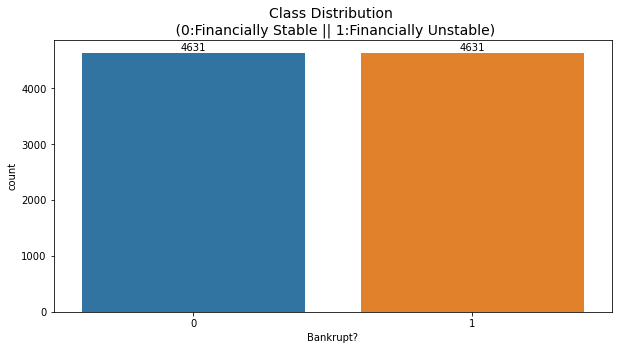

In [1100]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

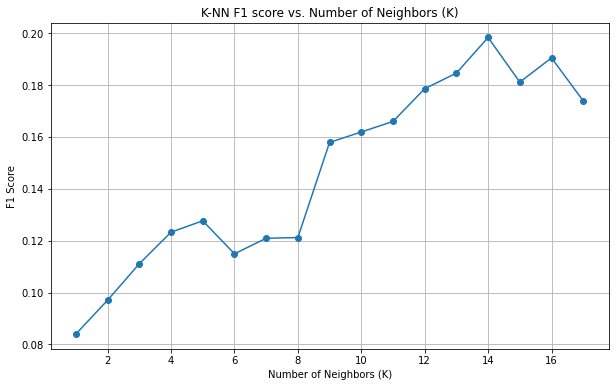

In [1101]:
k_values = range(1, 18)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled_smote, y_resampled_smote)
    y_val_pred_smote = knn_classifier.predict(X_val_smote)
    f1_value = metrics.f1_score(y_val_smote, y_val_pred_smote)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN F1 score vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [1102]:
k = 14
knn_classifier_smote = KNeighborsClassifier(n_neighbors=k)

In [1103]:
knn_classifier_smote.fit(X_resampled_smote, y_resampled_smote)

KNeighborsClassifier(n_neighbors=14)

In [1104]:
y_val_pred_smote = knn_classifier_smote.predict(X_val_smote)

In [1105]:
validation_accuracy = accuracy_score(y_val_smote, y_val_pred_smote)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.8103616813294232


In [1106]:
conf_matrix_validation = confusion_matrix(y_val_smote, y_val_pred_smote)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[805 179]
 [ 15  24]]


In [1107]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.81
Precision: 0.12
Recall: 0.62
F1 Score: 0.20


In [1108]:
y_test_pred_smote = knn_classifier_smote.predict(X_test_smote)

In [1109]:
test_accuracy = accuracy_score(y_test_smote, y_test_pred_smote)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8015640273704789


In [1110]:
conf_matrix_testing = confusion_matrix(y_test_smote, y_test_pred_smote)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[803 181]
 [ 22  17]]


In [1111]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.80
Precision: 0.09
Recall: 0.44
F1 Score: 0.14


<H1>SMOTE = 0.5</H1>

In [1112]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.3, random_state=42)

In [1113]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [1114]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)

In [1115]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

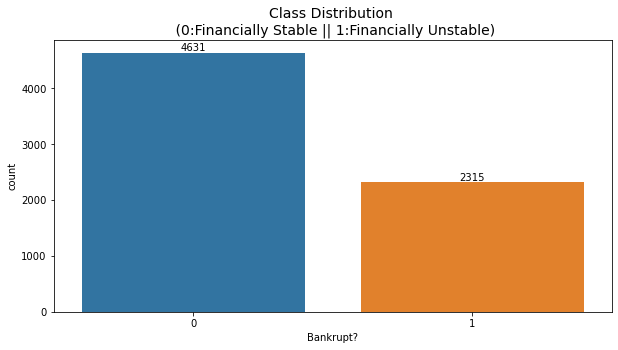

In [1116]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

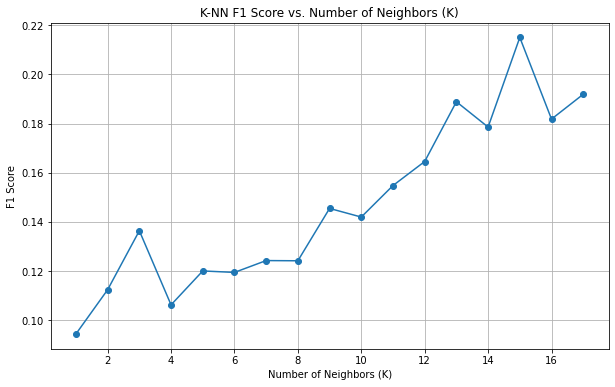

In [1117]:
k_values = range(1, 18)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled_smote, y_resampled_smote)
    y_val_pred_smote = knn_classifier.predict(X_val_smote)
    f1_value = metrics.f1_score(y_val_smote, y_val_pred_smote)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN F1 Score vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [1118]:
k = 15
knn_classifier_smote = KNeighborsClassifier(n_neighbors=k)

In [1119]:
knn_classifier_smote.fit(X_resampled_smote, y_resampled_smote)

KNeighborsClassifier(n_neighbors=15)

In [1120]:
y_val_pred_smote = knn_classifier_smote.predict(X_val_smote)

In [1121]:
validation_accuracy = accuracy_score(y_val_smote, y_val_pred_smote)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.8572825024437928


In [1122]:
conf_matrix_validation = confusion_matrix(y_val_smote, y_val_pred_smote)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[857 127]
 [ 19  20]]


In [1123]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.86
Precision: 0.14
Recall: 0.51
F1 Score: 0.22


In [1124]:
y_test_pred_smote = knn_classifier_smote.predict(X_test_smote)

In [1125]:
test_accuracy = accuracy_score(y_test_smote, y_test_pred_smote)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.855327468230694


In [1126]:
conf_matrix_testing = confusion_matrix(y_test_smote, y_test_pred_smote)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[863 121]
 [ 27  12]]


In [1127]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.86
Precision: 0.09
Recall: 0.31
F1 Score: 0.14


<H1>SMOTE = 0.25</H1>

In [1128]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.3, random_state=42)

In [1129]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [1130]:
smote = SMOTE(sampling_strategy=0.25, random_state=42)

In [1131]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

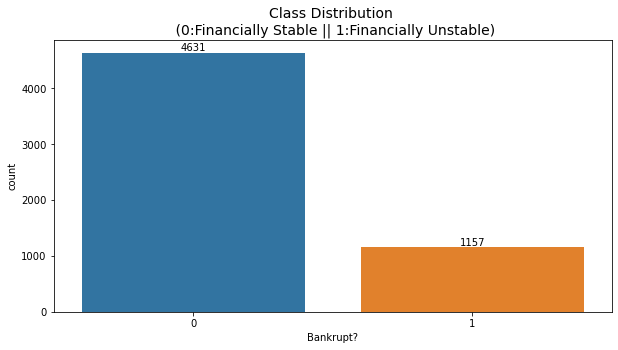

In [1132]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

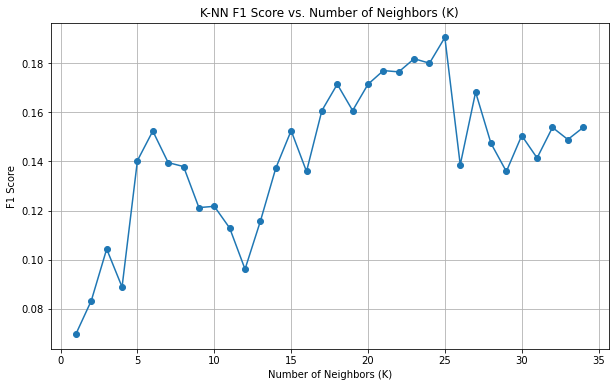

In [1133]:
k_values = range(1, 35)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled_smote, y_resampled_smote)
    y_val_pred_smote = knn_classifier.predict(X_val_smote)
    f1_value = metrics.f1_score(y_val_smote, y_val_pred_smote)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN F1 Score vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [1134]:
k = 25
knn_classifier_smote = KNeighborsClassifier(n_neighbors=k)

In [1135]:
knn_classifier_smote.fit(X_resampled_smote, y_resampled_smote)

KNeighborsClassifier(n_neighbors=25)

In [1136]:
y_val_pred_smote = knn_classifier_smote.predict(X_val_smote)

In [1137]:
validation_accuracy = accuracy_score(y_val_smote, y_val_pred_smote)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.916911045943304


In [1138]:
conf_matrix_validation = confusion_matrix(y_val_smote, y_val_pred_smote)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[928  56]
 [ 29  10]]


In [1139]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.92
Precision: 0.15
Recall: 0.26
F1 Score: 0.19


In [1140]:
y_test_pred_smote = knn_classifier_smote.predict(X_test_smote)

In [1141]:
test_accuracy = accuracy_score(y_test_smote, y_test_pred_smote)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9159335288367546


In [1142]:
conf_matrix_testing = confusion_matrix(y_test_smote, y_test_pred_smote)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[933  51]
 [ 35   4]]


In [1143]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.92
Precision: 0.07
Recall: 0.10
F1 Score: 0.09


<H1>ADASYN</H1>

In [1144]:
# divinding our dataset into training dataset
X_train_adasyn, X_temp_adasyn, y_train_adasyn, y_temp_adasyn = train_test_split(X, y, test_size=0.3, random_state=42)

In [1145]:
X_val_adasyn, X_test_adasyn, y_val_adasyn, y_test_adasyn = train_test_split(X_temp_adasyn, y_temp_adasyn, test_size=0.5, random_state=42)

In [1146]:
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

In [1147]:
X_resampled_adasyn, y_resampled_adasyn = smote.fit_resample(X_train_adasyn, y_train_adasyn)

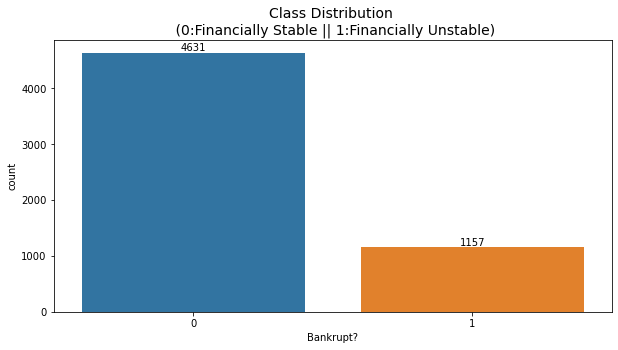

In [1148]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_adasyn)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

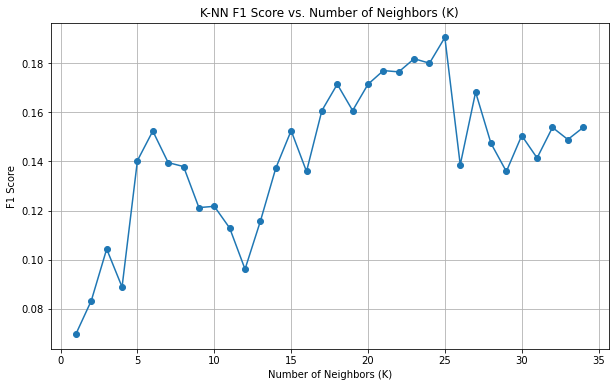

In [1149]:
k_values = range(1, 35)

# Initialize lists to store accuracy scores for each K
f1_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled_adasyn, y_resampled_adasyn)
    y_val_pred_adasyn = knn_classifier.predict(X_val_adasyn)
    f1_value = metrics.f1_score(y_val_adasyn, y_val_pred_adasyn)
    f1_scores.append(f1_value)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("K-NN F1 Score vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [1150]:
k = 25
knn_classifier_smote = KNeighborsClassifier(n_neighbors=k)

In [1151]:
knn_classifier_smote.fit(X_resampled_adasyn, y_resampled_adasyn)

KNeighborsClassifier(n_neighbors=25)

In [1152]:
y_val_pred_adasyn = knn_classifier_smote.predict(X_val_adasyn)

In [1153]:
validation_accuracy = accuracy_score(y_val_adasyn, y_val_pred_adasyn)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.916911045943304


In [1154]:
conf_matrix_validation = confusion_matrix(y_val_adasyn, y_val_pred_adasyn)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[928  56]
 [ 29  10]]


In [1155]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.92
Precision: 0.15
Recall: 0.26
F1 Score: 0.19


In [1156]:
y_test_pred_adasyn = knn_classifier_smote.predict(X_test_adasyn)

In [1157]:
test_accuracy = accuracy_score(y_test_adasyn, y_test_pred_adasyn)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9159335288367546


In [1158]:
conf_matrix_testing = confusion_matrix(y_test_adasyn, y_test_pred_adasyn)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[933  51]
 [ 35   4]]


In [1159]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.92
Precision: 0.07
Recall: 0.10
F1 Score: 0.09
